In [36]:
import pandas as pd
import numpy as np

In [37]:
import pandas as pd

# Define the file path
file_path = r"C:\Users\user\Desktop\iit\year2 sem1\sdgp\AgroEdge\server\ML_part\price_forcasting\vegetable_fruit_prices.xlsx"

# Read the Excel file
df = pd.read_excel(file_path)

# Display the first few rows
df.head()


,Date,Commodity,Market Region,Price per Unit (LKR/kg)
0,2020-02-13,Winged Bean,Ampara,376.43
1,2020-02-13,Winged Bean,Anuradhapura,210.15
2,2020-02-13,Winged Bean,Badulla,362.29
3,2020-02-13,Winged Bean,Batticaloa,169.92
4,2020-02-13,Winged Bean,Colombo,372.34


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130000 entries, 0 to 129999
Data columns (total 4 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Date                     130000 non-null  datetime64[ns]
 1   Commodity                130000 non-null  object        
 2   Market Region            130000 non-null  object        
 3   Price per Unit (LKR/kg)  130000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 4.0+ MB


In [39]:
# Count missing values in each column
print(df.isnull().sum())

Date                       0
Commodity                  0
Market Region              0
Price per Unit (LKR/kg)    0
dtype: int64


In [40]:
# Drop exact duplicate rows
df = df.drop_duplicates()

print("No of duplicates:", df.duplicated().sum())

No of duplicates: 0


In [41]:
# convert the dates to date time format
df['Date'] = pd.to_datetime(df['Date'])

In [42]:
import numpy as np

Q1 = df['Price per Unit (LKR/kg)'].quantile(0.25)
Q3 = df['Price per Unit (LKR/kg)'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['Price per Unit (LKR/kg)'] < lower_bound) | (df['Price per Unit (LKR/kg)'] > upper_bound)]
print("Number of outliers:", len(outliers))

Number of outliers: 0


In [43]:
df['Commodity'] = df['Commodity'].str.strip().str.lower()
df['Commodity'] = df['Commodity'].str.strip().str.lower()

In [44]:
df

,Date,Commodity,Market Region,Price per Unit (LKR/kg)
0,2020-02-13,winged bean,Ampara,376.43
1,2020-02-13,winged bean,Anuradhapura,210.15
2,2020-02-13,winged bean,Badulla,362.29
3,2020-02-13,winged bean,Batticaloa,169.92
4,2020-02-13,winged bean,Colombo,372.34
...,...,...,...,...
129995,2025-01-30,manioc,Polonnaruwa,326.07
129996,2025-01-30,manioc,Puttalam,258.84
129997,2025-01-30,manioc,Ratnapura,53.62
129998,2025-01-30,manioc,Trincomalee,106.01


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

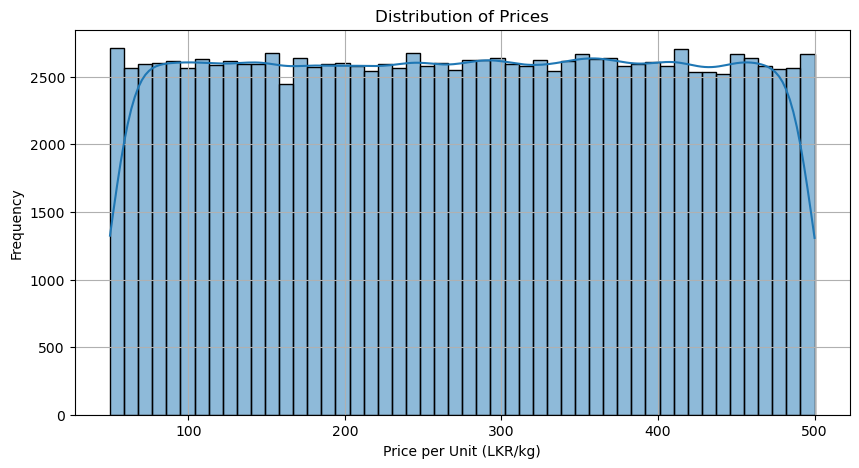

In [46]:
# General Price Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Price per Unit (LKR/kg)'], bins=50, kde=True)
plt.title("Distribution of Prices")
plt.xlabel("Price per Unit (LKR/kg)")
plt.ylabel("Frequency")
plt.grid()
plt.show()


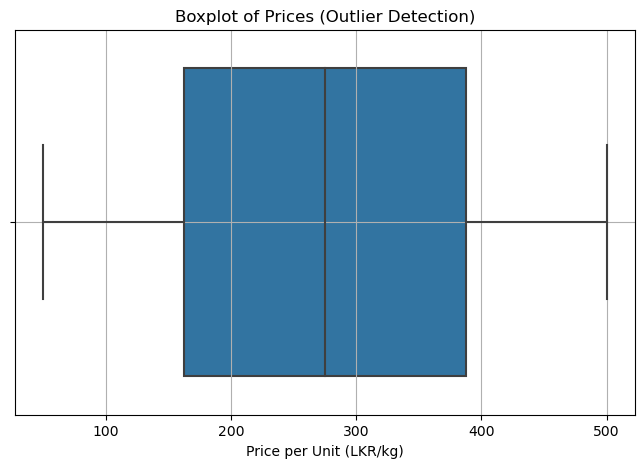

In [47]:
# Boxplot for detecting outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Price per Unit (LKR/kg)'])
plt.title("Boxplot of Prices (Outlier Detection)")
plt.xlabel("Price per Unit (LKR/kg)")
plt.grid()
plt.show()

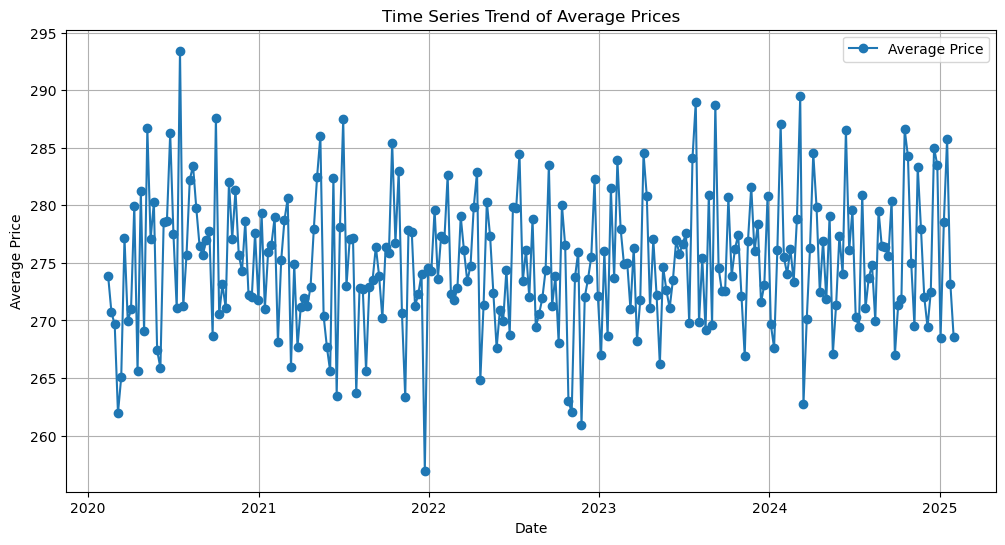

In [48]:
# Time Series Plot for Average Price Trend
df_avg_price = df.groupby("Date")["Price per Unit (LKR/kg)"].mean()

plt.figure(figsize=(12, 6))
plt.plot(df_avg_price.index, df_avg_price.values, marker="o", linestyle="-", label="Average Price")
plt.title("Time Series Trend of Average Prices")
plt.xlabel("Date")
plt.ylabel("Average Price")
plt.legend()
plt.grid()
plt.show()

In [49]:
# Show unique crop and city counts
unique_crops = df['Commodity'].nunique()
unique_cities = df['Market Region'].nunique()

# Display results
unique_crops, unique_cities

(20, 25)

In [50]:
from sklearn.preprocessing import LabelEncoder
from IPython.display import display  
import pandas as pd


# Encode categorical variables
crop_encoder = LabelEncoder()
city_encoder = LabelEncoder()

df["Commodity_Encoded"] = crop_encoder.fit_transform(df["Commodity"])
df["Market_Region_Encoded"] = city_encoder.fit_transform(df["Market Region"])

# Drop original categorical columns
df_encoded = df.drop(columns=["Commodity", "Market Region"])

# Display first few rows of the updated dataset
display(df_encoded)  

,Date,Price per Unit (LKR/kg),Commodity_Encoded,Market_Region_Encoded
0,2020-02-13,376.43,19,0
1,2020-02-13,210.15,19,1
2,2020-02-13,362.29,19,2
3,2020-02-13,169.92,19,3
4,2020-02-13,372.34,19,4
...,...,...,...,...
129995,2025-01-30,326.07,12,20
129996,2025-01-30,258.84,12,21
129997,2025-01-30,53.62,12,22
129998,2025-01-30,106.01,12,23


In [51]:
# Retrieve the mapping for Commodity
commodity_mapping = {index: value for index, value in enumerate(crop_encoder.classes_)}
print("\nCommodity Encoding Mapping:")
for key, val in commodity_mapping.items():
    print(f"{val} -> {key}")

# Retrieve the mapping for Market Region
market_region_mapping = {index: value for index, value in enumerate(city_encoder.classes_)}
print("\nMarket Region Encoding Mapping:")
for key, val in market_region_mapping.items():
    print(f"{val} -> {key}")


Commodity Encoding Mapping:
asiatic pennywort -> 0
beetroot -> 1
bitter melon -> 2
breadfruit -> 3
brinjal -> 4
cabbage -> 5
carrot -> 6
drumsticks -> 7
jackfruit -> 8
knol-khol -> 9
leeks -> 10
long purple eggplant -> 11
manioc -> 12
onion -> 13
pennywort -> 14
potato -> 15
pumpkin -> 16
red spinach -> 17
taro -> 18
winged bean -> 19

Market Region Encoding Mapping:
Ampara -> 0
Anuradhapura -> 1
Badulla -> 2
Batticaloa -> 3
Colombo -> 4
Galle -> 5
Gampaha -> 6
Hambantota -> 7
Jaffna -> 8
Kalutara -> 9
Kandy -> 10
Kegalle -> 11
Kilinochchi -> 12
Kurunegala -> 13
Mannar -> 14
Matale -> 15
Matara -> 16
Monaragala -> 17
Mullaitivu -> 18
Nuwara Eliya -> 19
Polonnaruwa -> 20
Puttalam -> 21
Ratnapura -> 22
Trincomalee -> 23
Vavuniya -> 24


In [52]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Apply MinMaxScaler to price column
scaler = MinMaxScaler()
df["Price_Scaled"] = scaler.fit_transform(df[["Price per Unit (LKR/kg)"]])

# Drop unnecessary columns
df_scaled = df.drop(columns=["Price per Unit (LKR/kg)", "Commodity", "Market Region"])

# Display the transformed dataset in Jupyter Notebook
display(df_scaled)  # Use this in Jupyter Notebook

,Date,Commodity_Encoded,Market_Region_Encoded,Price_Scaled
0,2020-02-13,19,0,0.725394
1,2020-02-13,19,1,0.355875
2,2020-02-13,19,2,0.693971
3,2020-02-13,19,3,0.266473
4,2020-02-13,19,4,0.716305
...,...,...,...,...
129995,2025-01-30,12,20,0.613480
129996,2025-01-30,12,21,0.464077
129997,2025-01-30,12,22,0.008022
129998,2025-01-30,12,23,0.124447


In [53]:
from statsmodels.tsa.stattools import adfuller  # Import ADF test function

# Reduce dataset size for ADF test (sampling 5000 records)
sample_size = 5000
df_sample = df.sample(n=sample_size, random_state=42)

# Run ADF test on the sampled data
adf_test_result = adfuller(df_sample["Price_Scaled"])

# Extract the p-value
stationarity_p_value = adf_test_result[1]

# Determine stationarity
is_stationary = "Stationary" if stationarity_p_value < 0.05 else "Non-Stationary"

# Display results
print(f"ADF Test p-value: {stationarity_p_value}")
print(f"Dataset is: {is_stationary}")


ADF Test p-value: 0.0
Dataset is: Stationary


In [54]:
df_preprocessed = df_scaled

In [55]:
df_preprocessed

,Date,Commodity_Encoded,Market_Region_Encoded,Price_Scaled
0,2020-02-13,19,0,0.725394
1,2020-02-13,19,1,0.355875
2,2020-02-13,19,2,0.693971
3,2020-02-13,19,3,0.266473
4,2020-02-13,19,4,0.716305
...,...,...,...,...
129995,2025-01-30,12,20,0.613480
129996,2025-01-30,12,21,0.464077
129997,2025-01-30,12,22,0.008022
129998,2025-01-30,12,23,0.124447


In [56]:
pip install numpy==1.23.5

Note: you may need to restart the kernel to use updated packages.


In [57]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from datetime import timedelta
import matplotlib.pyplot as plt

In [58]:
try:
    print("Checking dataset...")
    print(df_preprocessed.head())  # Display first rows to confirm dataset is loaded
except NameError:
    print("Error: df_preprocessed is not defined. Load the dataset before running the model.")
    raise SystemExit

# Print unique values for debugging
print("Unique Commodities:", df_preprocessed["Commodity_Encoded"].unique())
print("Unique Regions:", df_preprocessed["Market_Region_Encoded"].unique())

Checking dataset...
        Date  Commodity_Encoded  Market_Region_Encoded  Price_Scaled
0 2020-02-13                 19                      0      0.725394
1 2020-02-13                 19                      1      0.355875
2 2020-02-13                 19                      2      0.693971
3 2020-02-13                 19                      3      0.266473
4 2020-02-13                 19                      4      0.716305
Unique Commodities: [19  2  4 11  0 17 14 10  6  1  5  9 16 13 15  7  8  3 18 12]
Unique Regions: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]


In [59]:
def prepare_lstm_data(series, n_lags):
    """Prepare time series data for LSTM."""
    X, y = [], []
    for i in range(len(series) - n_lags):
        X.append(series[i:i + n_lags])
        y.append(series[i + n_lags])
    return np.array(X), np.array(y)

In [60]:
selected_commodity = 5  # Example: Change based on user selection (I added this just for cheking the input)
selected_region = 12     # Example: Change based on user selection (I added this just for cheking the input)

# Check if the selected commodity and region exist
if selected_commodity not in df_preprocessed["Commodity_Encoded"].unique():
    raise ValueError(f"Commodity {selected_commodity} not found in dataset.")
if selected_region not in df_preprocessed["Market_Region_Encoded"].unique():
    raise ValueError(f"Region {selected_region} not found in dataset.")

In [61]:
df_filtered = df_preprocessed[
    (df_preprocessed["Commodity_Encoded"] == selected_commodity) & 
    (df_preprocessed["Market_Region_Encoded"] == selected_region)
]

# Ensure the dataset is sorted by date
df_filtered = df_filtered.sort_values("Date")

# Convert "Date" column to datetime format
df_filtered["Date"] = pd.to_datetime(df_filtered["Date"])

# Check if 'Price_Scaled' exists
if "Price_Scaled" not in df_filtered.columns:
    raise KeyError("Column 'Price_Scaled' not found in dataset.")

# Use 'Price_Scaled' as the target variable
prices = df_filtered["Price_Scaled"].values

# Define the number of past weeks to consider for forecasting
n_lags = 12  # Using past 12 weeks to predict the next 12 weeks

# Prepare input features and target labels
X, y = prepare_lstm_data(prices, n_lags)

# Check for empty arrays
if len(X) == 0 or len(y) == 0:
    raise ValueError("Not enough data points available for training. Try selecting a different commodity or region.")

# Reshape for LSTM (samples, time steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

In [62]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Check shapes before training
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (198, 12, 1)
y_train shape: (198,)


In [63]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import os


In [64]:
# Define Callbacks
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',  # Reduce LR if val_loss plateaus
    factor=0.5,  
    patience=5,  
    min_lr=1e-6  
)

early_stopping = EarlyStopping(
    monitor='val_loss',  # Stop training if val_loss doesn't improve
    patience=10,  
    restore_best_weights=True  # Restore best weights when stopping
)

# Define Callbacks
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',  # Reduce LR if val_loss plateaus
    factor=0.5,  
    patience=5,  
    min_lr=1e-6  
)

early_stopping = EarlyStopping(
    monitor='val_loss',  # Stop training if val_loss doesn't improve
    patience=10,  
    restore_best_weights=True  # Restore best weights when stopping
)

# Define and compile the model
model = Sequential([
    Input(shape=(n_lags, 1)),  # Fix input shape issue
    LSTM(128, activation='relu', return_sequences=True),  
    Dropout(0.15),  
    LSTM(128, activation='relu'),  
    Dropout(0.15),
    Dense(1)  
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mse')

# Train the model
history = model.fit(
    X_train, y_train, 
    epochs=100,  # Early stopping decides the stopping point
    batch_size=32,  
    validation_data=(X_test, y_test),  
    verbose=1,  
    callbacks=[lr_scheduler, early_stopping]
)


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 0.2895 - val_loss: 0.1931 - learning_rate: 5.0000e-04
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2098 - val_loss: 0.1201 - learning_rate: 5.0000e-04
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1086 - val_loss: 0.0766 - learning_rate: 5.0000e-04
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0881 - val_loss: 0.0803 - learning_rate: 5.0000e-04
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0719 - val_loss: 0.0731 - learning_rate: 5.0000e-04
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0686 - val_loss: 0.0756 - learning_rate: 5.0000e-04
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0721 - val_loss: 0.0718 - learning_rate: 5.0000e-04
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0759 - val_loss: 0.0748 - learning_rate: 5.0000e-04
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0781 - val_loss: 0.0718 - learning_rate: 5.0

In [65]:
model_path = "time_series_forecasting_model.keras"
model.save(model_path)
print(f"Model saved at {model_path}")


Model saved at time_series_forecasting_model.keras


In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model

In [67]:
# Load dataset
df = pd.read_excel("vegetable_fruit_prices.xlsx")  # Ensure the correct dataset path

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Clean column names
df['Commodity'] = df['Commodity'].str.strip().str.lower()
df['Market_Region'] = df['Market Region'].str.strip().str.lower()


In [68]:
# Load the trained model
model = load_model("time_series_forecasting_model.keras")


In [69]:
def predict_prices(commodity, market_region):
    # Filter dataset based on user input
    df_filtered = df[(df['Commodity'] == commodity) & (df['Market_Region'] == market_region)]
    
    if df_filtered.empty:
        print("No data available for the selected commodity and market region.")
        return None

    # Ensure Data is Sorted by Date
    df_filtered = df_filtered.sort_values(by="Date")

    # Fit MinMaxScaler on the filtered price column
    scaler = MinMaxScaler()
    scaler.fit(df_filtered[['Price per Unit (LKR/kg)']])  # Fit on actual price values

    # Prepare the latest available data for input
    n_lags = 10  # Assuming 10 previous weeks are used as input
    last_n_weeks = df_filtered['Price per Unit (LKR/kg)'].values[-n_lags:]  # Get last N weeks

    if len(last_n_weeks) < n_lags:
        print("Not enough historical data for prediction.")
        return None

    # Reshape input for model
    current_input = scaler.transform(last_n_weeks.reshape(-1, 1)).reshape(1, n_lags, 1)

    # Generate 12-week future predictions
    future_predictions = []
    for _ in range(12):
        prediction = model.predict(current_input)[0][0]
        future_predictions.append(prediction)

        # Update input for next prediction
        current_input = np.roll(current_input, shift=-1, axis=1)
        current_input[0, -1, 0] = prediction

    # Convert predictions back to original scale
    future_predictions = np.array(future_predictions).reshape(-1, 1)
    original_values = scaler.inverse_transform(future_predictions)  # Reverse scaling

    # Generate corresponding future dates
    last_date = pd.to_datetime(df_filtered['Date'].iloc[-1])  # Last available date
    future_dates = [last_date + pd.DateOffset(weeks=i+1) for i in range(12)]

    # Create DataFrame for User Output
    future_forecast = pd.DataFrame({'Date': future_dates, 'Predicted Price': original_values.flatten()})

    # Display results
    print(future_forecast)

    # Save to CSV
    future_forecast.to_csv(f"forecast_{commodity}_{market_region}.csv", index=False)
    print(f"Predictions saved as 'forecast_{commodity}_{market_region}.csv'")

    # Plot the Predictions
    plt.figure(figsize=(10, 5))
    plt.plot(future_forecast['Date'], future_forecast['Predicted Price'], marker='o', linestyle='-', label="Predicted Prices")
    plt.xlabel("Date")
    plt.ylabel("Predicted Price (LKR/kg)")
    plt.title(f"12-Week Future Price Forecast for {commodity.capitalize()} in {market_region.capitalize()}")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()
    plt.show()


Enter Commodity: breadfruit
Enter Market Region: Colombo


C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
         Date  Predicted Price
0  2025-02-06       217.799713
1  2025-02-13       219.316818
2  2025-02-20       218.473938
3  2025-02-27       215.887207
4  2025-03-06       217.273270
5  2025-03-13       211.251663
6  2025-03-20       200.204697
7  2025-03-27       200.768448
8  2025-04-03       198.115738
9  2025-04-10       201.800781
10 2025-04-17       206.386185
11 2025-04-24       205.722687
Predictions saved as 'forecast_breadfruit_colombo.csv'


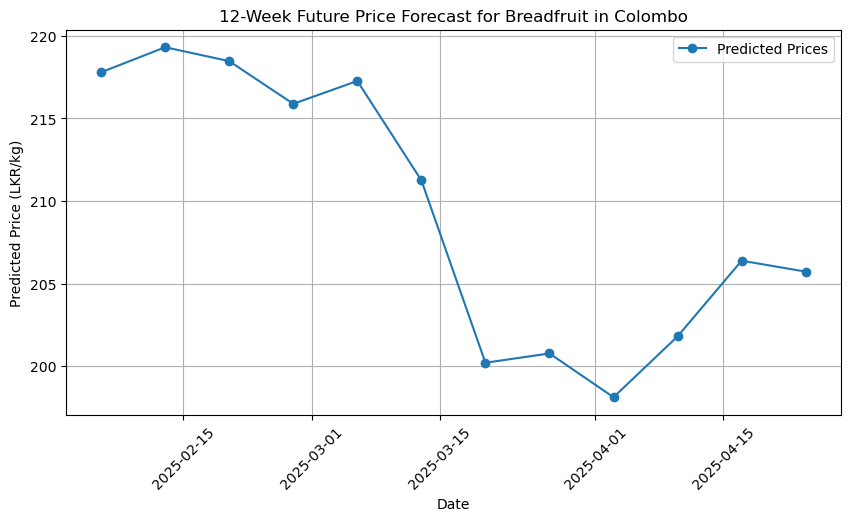

In [70]:
# Take User Input and Predict
user_commodity = input("Enter Commodity: ").strip().lower()
user_market_region = input("Enter Market Region: ").strip().lower()
predict_prices(user_commodity, user_market_region)
